# What drives Zestimate LogError?

### Project Goals
* Identify key features that can be used to create an effective predictive model
* Use features to develop a machine learning model that predicts the Zestimate LogErrors

### Imports

In [1]:
#imports needed for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from importlib import reload


#modules created for this report
import wrangle as w
import explore as e
import model as m

### Acquire

* Data acquired from the Codeup mySQL server
* Contained 52205 rows and 15 columns
* Each row represents an individual parcel
* Each column represents a feature of that parcel

In [2]:
#acquiring raw data from Codeup mySQL server
zillow_unclean = w.acquire_zillow_data()

### Prepare

#### Actions:


* Removed nulls in the data
    * For ```fireplace```, ```deck```, ```pool```, ```garage```, and ```hottub``` NULL values were converted to "0"
    * Rows containing null values in any column (< 1% dropped)
    
* Renamed columns to promote readability
    * ```county``` (names based on the fips code):  
        - 6037: LA
        - 6059: Orange 
        - 6111: Ventura 

    * ```2017_age```
        - Column displaying age of house in 2017 (2017-year_built)

* Split data into train, validate, and test (65/20/15)


***51843 rows before splitting*** 

In [3]:
#clean data
zillow = w.clean_zillow(zillow_unclean)

In [4]:
#preparing and splitting the data into sample sets
train, validate, test = w.split_data(zillow)

In [5]:
#scaling the train, validate, and test sample sets
train_scaled, validate_scaled, test_scaled =w.scale_zillow(train, validate, test, 'logerror')

### Data Summary

In [6]:
train.head()

,parcelid,logerror,bathrooms,bedrooms,sqft,latitude,longitude,lotsizesquarefeet,fireplace,deck,pool,garage,hottub,county,2017_age
46729,11669351,0.037351,4.0,4,3470,34045821.0,-118517058.0,7148,0,0,0,0,0,LA,12
47582,13844703,-0.103982,1.0,3,999,33728543.0,-117879618.0,6716,0,0,1,1,1,Orange,67
32610,14110023,0.042899,3.0,5,1803,33825991.0,-118045155.0,6203,0,0,0,1,1,Orange,53
22180,11703748,-0.002878,1.0,2,1586,34001625.0,-118304436.0,5867,0,0,0,0,0,LA,105
28282,13899266,0.166119,1.0,2,902,33427590.0,-117617406.0,4600,0,0,0,1,1,Orange,57


### Data Dictionary
| Feature | Definition | Type |
|:--------|:-----------|:-------
|**parcelid**|  Unique identifier for parcels (lots) | *int*|
|**bathroooms** |  Number of bathrooms in home |*float*|
|**bedrooms** | Number of bedrooms in home |*int*|
|**sqft**| Area of home in square feet | *int*|
|**year_built**| Year home was built| *int*|
|**latitude**| Latitude of the middle of the parcel | *float*|
|**longitude**| Longitude of the middle of the parcel | *float*|
|**lotsizesquarefeet**|  Area of the lot in square feet | *float*|
|**fireplace**| Is there a fireplace? 1-Yes, 0-No | *int*|
|**deck**| Is there a deck? 1-Yes, 0-No | *int*|
|**pool**| Is there a pool? 1-Yes, 0-No | *int*|
|**garage**| Is there a garage? 1-Yes, 0-No | *int*|
|**hottub**| Is there a hottub? 1-Yes, 0-No | *int*|
|**county**| County where the home is located | *string*|
|**2017_age**| Age of the home as of 2017 | *int*|
|**Target Variable**
|**logerror**| 𝑙𝑜𝑔𝑒𝑟𝑟𝑜𝑟=𝑙𝑜𝑔(𝑍𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒)−𝑙𝑜𝑔(𝑆𝑎𝑙𝑒𝑃𝑟𝑖𝑐𝑒) | *float* |

## Explore

### What is the distribution of LogError by county?

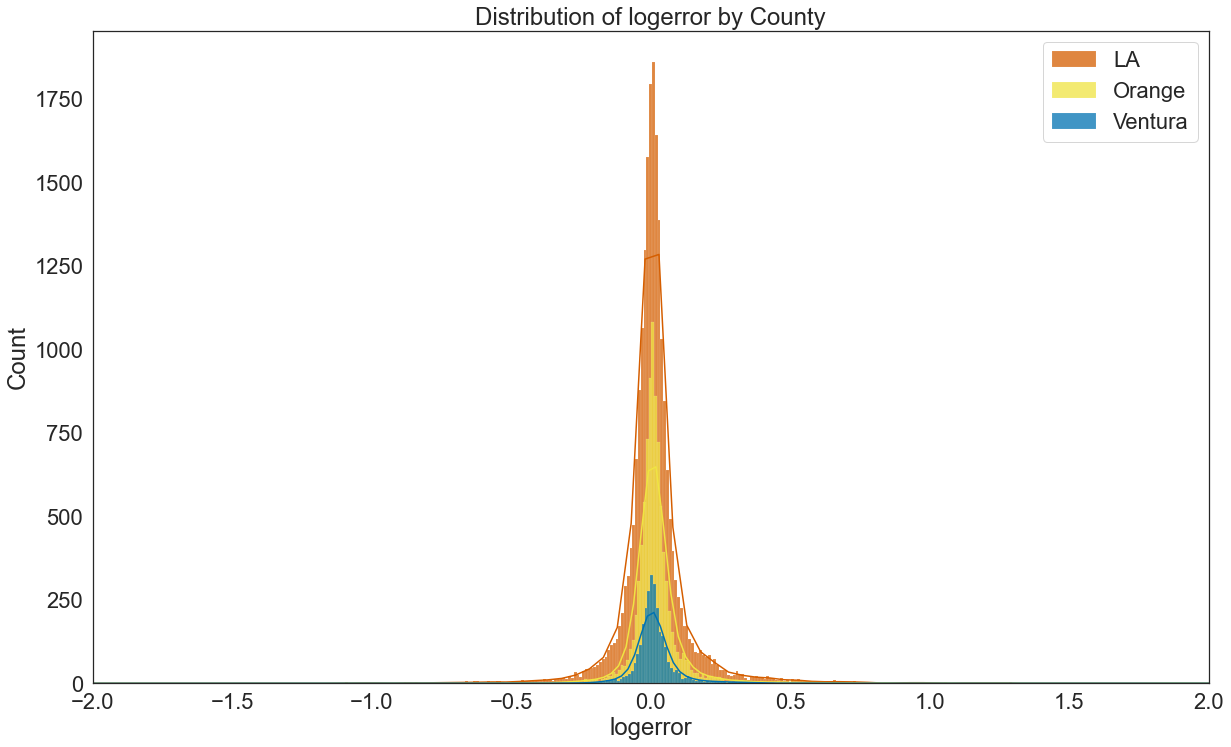

In [7]:
#viz showing LogError distribution by county
e.logerror_dist_by_county(train)

Our initial hypothesis was that in comparison to the largest county being LA, would show a significant difference in the LogError distribution. **What we discovered/ key takeaway is that the LogErrors were very similar in their distribution for each county.**

In [8]:
#preparing scaled data sample sets for clustering
train, train_scaled, validate_scaled, test_scaled = m.create_clusters(train, train_scaled, validate_scaled, test_scaled)

### Are total square feet of the lots size and total square feet of the home features of significance? 

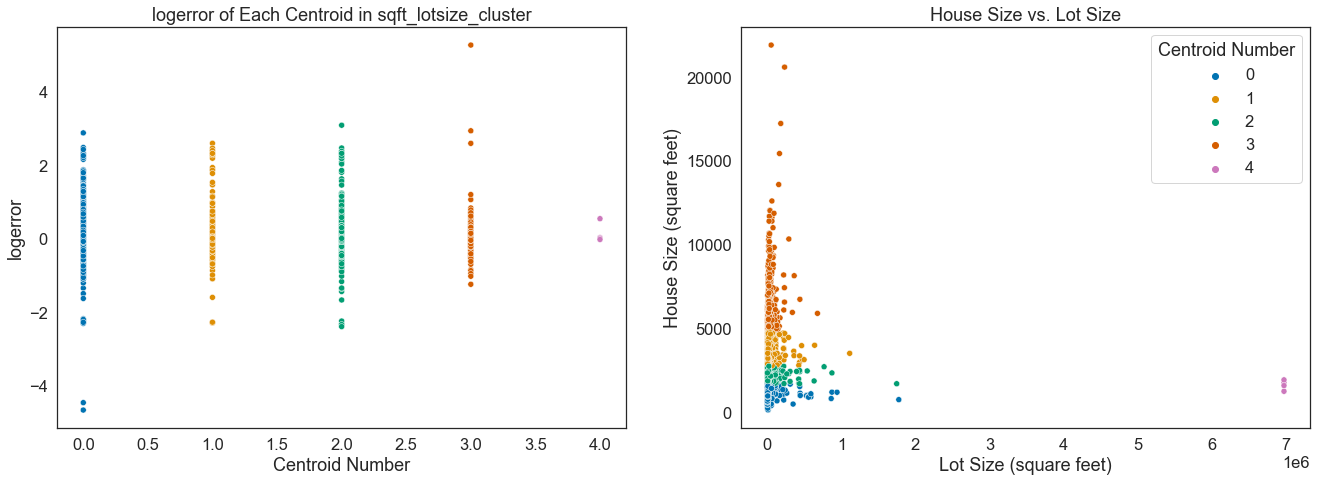

In [9]:
#viz showing LogError distribution for features: lotsizesquarefeet, sqft 
e.sqft_lotsize_cluster_plot(train)

The graph shows the LogError spread amongst the two features is predominate in 4 of the 5 cluster groups we have manually created. 
**Key takeaway that yes these two features show relational significance.** 

### Are the lattitude and longitude along with home size features of significance? 

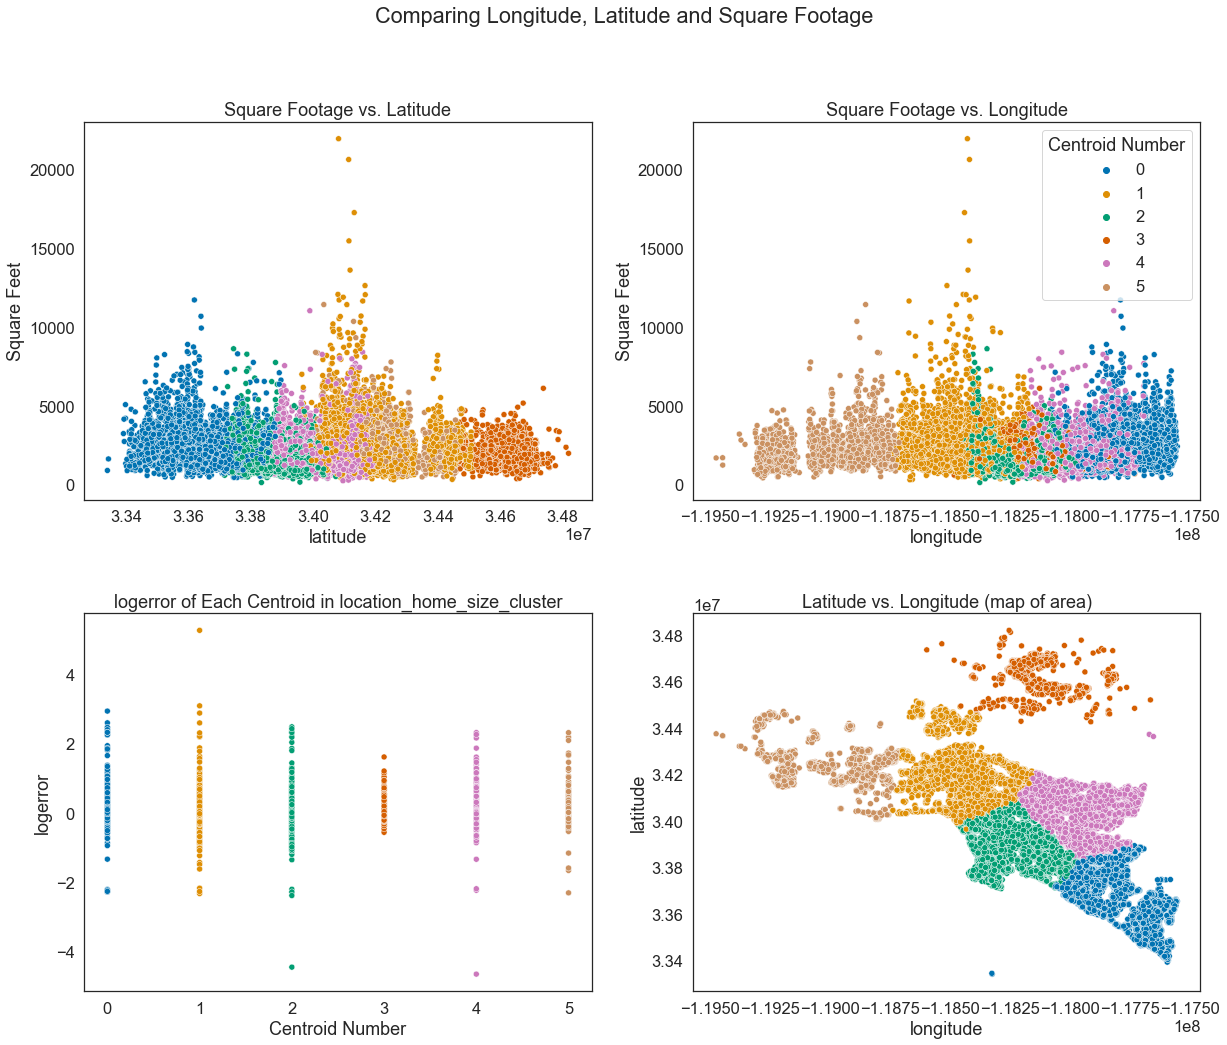

In [10]:
#viz showing LogError distribution for features: 
#lattitude, longitude, lotsizesquarefeet, sqft 
e.location_home_size_cluster_plot(train)

#### Visual Observation Notes:
       * Visualizations 1 & 2 show size of home versus lattitude and longitude. 
       * Visualization 3 shows combined features: size of home, lattitude, and longitude by LogError.
       * Visualization 4 shows lattitude & longitude.
 In third graph we can see the LogError more evenly spread among the 6 cluster groups we have manually created. 
 **Key takeaway being relational significance in combined features.**

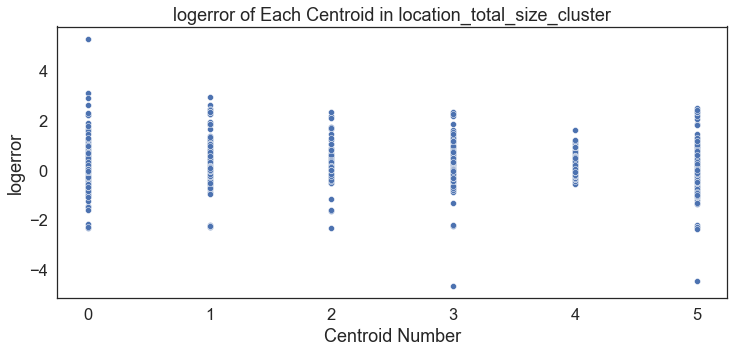

In [11]:
#viz showing LogError distribution for combined feature 
#location total size 
e.location_total_size_cluster_plot(train)

Key takeaway that yes these combined features of lattitude, longitude, lot size, and sqft of home show relational significance. 

In [ ]:
---- investigate centroid means 1 vs mean whole logerror---

**I will now use a T-test statistical test to investigate the newly created cluster feature "location_total_size" of the home and LogError** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

$H_0$ = Average LogError of feature "location_total_size" **is** the same.

$H_a$ = Average LogError of feature "location_total_size" **is not** the same.

In [18]:
#stats test results for location total size cluster model
location_total_size_cluster_1 = train[train['location_total_size_cluster'] ==1].logerror
stats.ttest_1samp(location_total_size_cluster_1,logerror_mean)

Ttest_1sampResult(statistic=3.8528862675484477, pvalue=0.00011780631627215693)

In [20]:
#create centroids for feature: special features 
for i in range(0,5):
    print(f"cluster{i} {train[train['special_features_cluster'] ==i].logerror.mean()}")

cluster0 0.015270422382747654
cluster1 0.028846405371527887
cluster2 0.01735746292064165
cluster3 0.022783146691348538
cluster4 0.012185907706013297


In [21]:
#stats test results for location total size cluster model
# special features???????
special_features_cluster_1 = train[train['location_total_size_cluster'] ==1].logerror
stats.ttest_1samp(location_total_size_cluster_1,logerror_mean)

Ttest_1sampResult(statistic=3.8528862675484477, pvalue=0.00011780631627215693)

In [22]:
#create encoded columns for regression modeling 
dummy_cols = ['special_features_cluster','location_total_size_cluster','county']

In [23]:
#adding the encoded colummns to dataframe
train_scaled, validate_scaled, test_scaled = w.encode_cat_features(train_scaled, validate_scaled, test_scaled, dummy_cols)

In [24]:
#brief overview of the data
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33697 entries, 46729 to 45805
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   parcelid                       33697 non-null  float64
 1   logerror                       33697 non-null  float64
 2   bathrooms                      33697 non-null  float64
 3   bedrooms                       33697 non-null  float64
 4   sqft                           33697 non-null  float64
 5   latitude                       33697 non-null  float64
 6   longitude                      33697 non-null  float64
 7   lotsizesquarefeet              33697 non-null  float64
 8   fireplace                      33697 non-null  float64
 9   deck                           33697 non-null  float64
 10  pool                           33697 non-null  float64
 11  garage                         33697 non-null  float64
 12  hottub                         33697 non-n

**special_features_cluster1 run stats test**

In [25]:
#save drivers to a list for modeling
drivers = ['special_features_cluster_1', 'location_total_size_cluster_1', '2017_age','bathrooms','bedrooms']

In [26]:
#preparing data sample sets for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = w.prep_for_model(train_scaled, validate_scaled, test_scaled, 'logerror', drivers)

In [27]:
#baseline model
m.baseline_models(y_train, y_validate)

,model,RMSE_train,RMSE_validate,Difference
0,mean_baseline,0.174556,0.18238,-0.007824


In [28]:
#results for regression models
m.regression_models(X_train, y_train, X_validate, y_validate)

,model,RMSE_train,r^2_train,RMSE_validate,r^2_validate
0,OLS Regressor,0.174330,0.002593,0.182290,0.000984
1,Lasso_alpha_1,0.174556,0.000000,0.182380,0.000000
2,Quadratic,0.174187,0.004230,0.182105,0.003015
3,Cubic,0.173986,0.006524,0.182390,-0.000112


In [29]:
#results for best model on test sample set
m.best_model(X_train, y_train, X_validate, y_validate, X_test, y_test)

,model,RMSE_train,r^2_train,RMSE_validate,r^2_validate,RMSE_test,r^2_test
0,Quadratic,0.174187,0.00423,0.182105,0.003015,0.172542,0.00163


### Conclusion

Run quad on test, but it's not a strong enough difference. The change over baseline is not enough to move forward.